<a href="https://colab.research.google.com/github/Ben-tech254/Key-factors-influencing-accidents/blob/main/Key_Factors_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Setting up Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#Downloading the zip file of the dataset
!kaggle datasets download -d willianoliveiragibin/key-factors-traffic-accidents

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
# Extracting the csv file of the dataset from the zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/key-factors-traffic-accidents.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Importing all the necesarry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline  as pyo

import warnings
warnings.filterwarnings('ignore')

#Setting up environment for data visualization with matplotlib and seaborn
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Handling potential encoding issues.
# Try different encodings until one works
encodings_to_try = ['utf-8', 'ISO-8859-1', 'utf-16', 'latin1']

for encoding in encodings_to_try:
    try:
        data = pd.read_csv('/content/traffic_accidents_dict new.csv', encoding=encoding)
        # If no error occurred, break out of the loop
        break
    except UnicodeDecodeError:
        print(f"Failed to decode using {encoding} encoding. Trying the next one...")

In [ ]:
#Having an overview of the data
data

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,Variable,Description
0,20,4.3709,2.3049,753.000,0.7700,1,321.5920,1.1944,290.8570,160.4320,accidents,"Number of recorded accidents, as a positive in..."
1,11,9.5564,3.2757,5.452,4.0540,1,478.6230,6.2960,931.8120,8.9108,traffic_fine_amount,"Traffic fine amount, expressed in thousands of..."
2,19,7.5879,2.0989,6.697,345.0000,0,364.4760,2.8584,830.0860,5.5727,traffic_density,"Traffic density index, scale from 0 (low) to 1..."
3,23,6.3879,4.9188,9.412,4.7290,0,20.9200,2.1065,813.1590,131.4520,traffic_lights,Proportion of traffic lights in the area (0 to...
4,23,2.4042,1.9610,7.393,1.7111,1,37.3780,1.7028,1.4663,6.9610,pavement_quality,"Pavement quality, scale from 0 (very poor) to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8751,27,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.9180,11.1542,0,0
8752,18,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.4030,17.0410,0,0
8753,31,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.2110,192.7690,0,0
8754,10,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.6590,3.6364,0,0


In [ ]:
#Extracting the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
 10  Variable             8756 non-null   object 
 11  Description          8756 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 821.0+ KB


In [ ]:
#Extracting the column names in the dataset
data.columns

Index(['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights',
       'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity',
       'vehicle_count', 'time_of_day', 'Variable', 'Description'],
      dtype='object')

In [ ]:
#Identifying the number of rows and columns in the dataset
data.shape

(8756, 12)

In [ ]:
#Visualizing the first five rows in the dataset
data.head()

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,Variable,Description
0,20,4.3709,2.3049,753.000,0.7700,1,321.592,1.1944,290.8570,160.4320,accidents,"Number of recorded accidents, as a positive in..."
1,11,9.5564,3.2757,5.452,4.0540,1,478.623,6.2960,931.8120,8.9108,traffic_fine_amount,"Traffic fine amount, expressed in thousands of..."
2,19,7.5879,2.0989,6.697,345.0000,0,364.476,2.8584,830.0860,5.5727,traffic_density,"Traffic density index, scale from 0 (low) to 1..."
3,23,6.3879,4.9188,9.412,4.7290,0,20.920,2.1065,813.1590,131.4520,traffic_lights,Proportion of traffic lights in the area (0 to...
4,23,2.4042,1.9610,7.393,1.7111,1,37.378,1.7028,1.4663,6.9610,pavement_quality,"Pavement quality, scale from 0 (very poor) to ..."


In [ ]:
#Visualizing the last five rows in the dataset
data.tail()

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day,Variable,Description
8751,27,2.7683,6.9423,6.604,3.3575,1,302.0010,1.9822,258.918,11.1542,0,0
8752,18,3.2629,1.7275,549.000,2.8478,1,6.2979,8.2730,296.403,17.0410,0,0
8753,31,2.5621,8.5263,2.784,3.2826,1,479.9340,2.8239,458.211,192.7690,0,0
8754,10,9.6205,1.4003,2.719,5.7760,1,280.7820,6.4030,147.659,3.6364,0,0
8755,12,8.6916,4.1981,5.386,2.3801,0,234.6320,1.1225,483.979,1.0790,0,0


In [ ]:
#Extracting the statistical statistics of the data
data.describe()

,accidents,traffic_fine_amount,traffic_density,traffic_lights,pavement_quality,urban_area,average_speed,rain_intensity,vehicle_count,time_of_day
count,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000,8756.000000
mean,20.625400,5.447824,14.252526,93.292068,22.442655,0.694381,214.642085,33.859295,453.234313,83.650263
std,5.228151,2.595654,75.965008,224.170457,112.193426,0.460695,168.707336,140.048354,313.882642,97.819456
min,5.000000,1.002000,0.240000,0.000000,0.000000,0.000000,0.970000,0.000000,1.026700,0.120000
25%,17.000000,3.195450,3.320775,3.775500,2.103350,0.000000,12.508500,1.668975,169.455750,6.514825
50%,21.000000,5.428500,5.563200,6.502500,3.276150,1.000000,223.125500,2.356450,453.982000,12.184300
75%,24.000000,7.675675,7.890175,9.226000,4.425700,1.000000,360.944750,3.704250,729.150250,174.777000
max,35.000000,9.997500,996.000000,999.000000,994.000000,1.000000,932.000000,999.000000,999.623000,999.000000


In [ ]:
#Checking if there are missing values
data.isnull().sum()

,0
accidents,0
traffic_fine_amount,0
traffic_density,0
traffic_lights,0
pavement_quality,0
urban_area,0
average_speed,0
rain_intensity,0
vehicle_count,0
time_of_day,0


##**Results for checking of missing values**

There are no missing values in the dataset.

In [ ]:
#Checking if there are duplicated values
data.duplicated().sum()
#data.duplicated().value_counts()

0

##**Results for checking of duplicate values**

There are no duplicate values in the dataset

In [ ]:
#Convert the data type of time_of_day from int64 to datetime64[ns]
data['time_of_day'] = data['time_of_day'].astype('datetime64[ns]')

##**Understanding** **Variables**
**accidents**	: Number of recorded accidents

**traffic_fine_amount** : Amount charged as fine for breaking traffic rules

**traffic_density**	: Traffic density index

**traffic_lights**	: Proportion of traffic lights in the area

**pavement_quality**	: Quality of pavement

**urban_area**	: Represents both urban area (1) and rural area (0)

**average_speed** : The average speed of vehicles

**rain_intensity** : Rain intensity ranging from 0 to 3

**vehicle_count** : Estimated number of vehicles in thousands

**time_of_day** : Time of the day in the 24-hour format


In [ ]:
data.value_counts()

accidents  traffic_fine_amount  traffic_density  traffic_lights  pavement_quality  urban_area  average_speed  rain_intensity  vehicle_count  time_of_day                    Variable  Description
5          8.5600               1.6040           318.000         3.3564            1           170.8150       563.0000        234.6520       1970-01-01 00:00:00.000000002  0         0              1
23         4.8109               9.5212           2.853           1.3492            1           43.7170        447.0000        347.6930       1970-01-01 00:00:00.000000010  0         0              1
           4.7650               5.7894           226.000         6.1210            0           9.5740         2.9446          811.5420       1970-01-01 00:00:00.000000022  0         0              1
           4.7675               9.7006           195.000         4.6953            0           9.4696         2.9508          44.6070        1970-01-01 00:00:00.000000164  0         0              1
           4.7734               1.7455           8.426           3.3301            1           32.7640        1.8887          994.1890       1970-01-01 00:00:00.000000218  0         0              1
                                                                                                                                                                                                    ..
18         7.5279               5.8237           6.073           3.9779            0           45.4410        1.2404          9.1956         1970-01-01 00:00:00.000000012  0         0              1
           7.5251               9.6935           655.000         1.9913            0           343.1390       5.2280          755.9070       1970-01-01 00:00:00.000000007  0         0              1
           7.5122               6.0946           3.926           2.2811            1           489.0550       4.6420          83.0220        1970-01-01 00:00:00.000000001  0         0              1
           7.5100               6.0500           6.534           4.3646            0           29.8110        1.8575          204.8270       1970-01-01 00:00:00.000000236  0         0              1
35         2.2008               9.0892           8.424           839.0000          1           309.4130       2.3648          45.9960        1970-01-01 00:00:00.000000012  0         0              1
Name: count, Length: 8756, dtype: int64

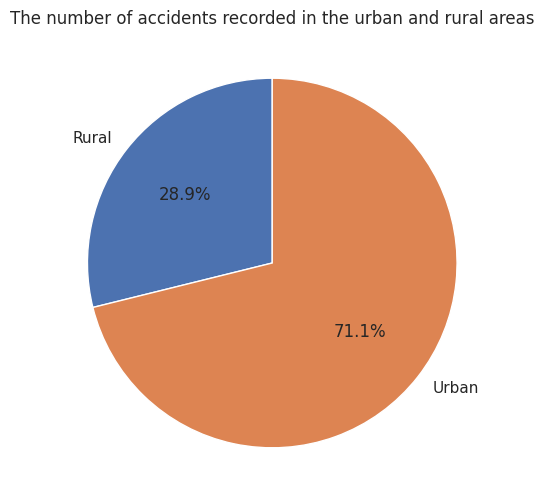

In [ ]:
#Identifying the number of accidents recorded in urban and rural areas

data1 = data.replace({0 : 'Rural', 1 : 'Urban'})

urban_rural_accidents = data1.groupby('urban_area')['accidents'].sum()
urban_rural_accidents

urban_rural = ['Rural', 'Urban']

plt.figure(figsize=(8, 6))
plt.pie(urban_rural_accidents, labels=urban_rural, autopct='%1.1f%%', startangle=90)
plt.title('The number of accidents recorded in the urban and rural areas')
plt.show()

##**The number of recorded accidents in urban and rural areas**

About 71% of the total number of accidents recorded were from the urban area while only about 29% of the total number of recorded accidents were from the rural area

-0.7451608644353378


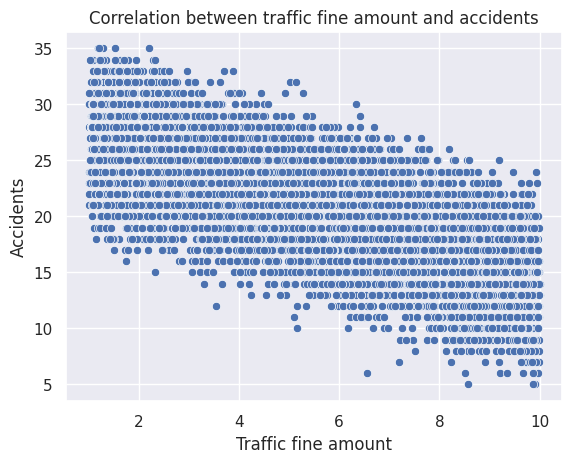

In [ ]:
##Checking the correlation between traffic fine amount and accidents
print(data['traffic_fine_amount'].corr(data['accidents']))

sns.scatterplot(data = data, x = 'traffic_fine_amount', y = 'accidents')
plt.title('Correlation between traffic fine amount and accidents')
plt.xlabel('Traffic fine amount')
plt.ylabel('Accidents')
plt.show()


##**Insights from correlation between traffic fine amount and accidents**

There's a negative correlation between traffic fine amount and accidents such that when traffic fine amount is increased, then the number of recorded accidents reduces by 74% and when the traffic fine amount is reduced, then the amount of recorded accidents increases by 74%.

0.06839883877452047


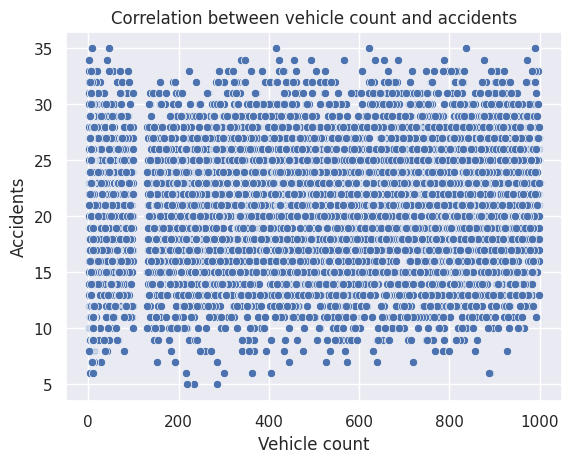

In [ ]:
##Checking the correlation between vehicle count and accidents
print(data['vehicle_count'].corr(data['accidents']))

sns.scatterplot(data = data, x = 'vehicle_count', y = 'accidents')
plt.title('Correlation between vehicle count and accidents')
plt.xlabel('Vehicle count')
plt.ylabel('Accidents')
plt.show()

##**Insights from correlation between vehicle count and accidents**

There's a positive correlation between vehicle count and accidents such that when the number of vehicle count increases, the number of recorded accidents increases by 6% and when the number of vehicle count decreases, then the number of recorded accidents decreases by 6%.

****

-0.05926505446005767


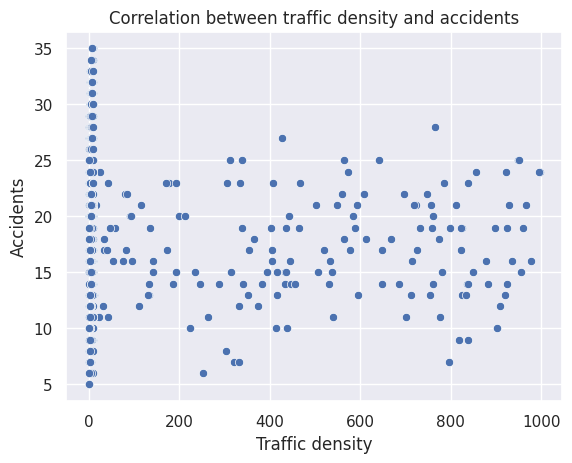

In [ ]:
##Checking the correlation between traffic density and accidents
print(data['accidents'].corr(data['traffic_density']))

sns.scatterplot(data = data, x = 'traffic_density', y = 'accidents')
plt.title('Correlation between traffic density and accidents')
plt.xlabel('Traffic density')
plt.ylabel('Accidents')
plt.show()

##**Insights from correlation between traffic density and accidents**

There's a negative correlation between traffic density and accidents such that when traffic density increases, then the number of recorded accidents decreases by 5% and when traffic density decreases, then there is an increase in the number of accidents by 5%.

-0.026641989839336525


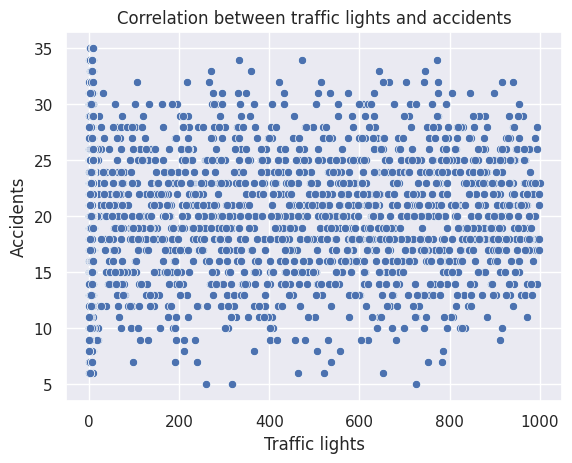

In [ ]:
#Checking the correlation between traffic lights and accidents
print(data['traffic_lights'].corr(data['accidents']))

sns.scatterplot(data = data, x = 'traffic_lights', y = 'accidents')
plt.title('Correlation between traffic lights and accidents')
plt.xlabel('Traffic lights')
plt.ylabel('Accidents')
plt.show()

##**Insights from correlation between traffic lights and accidents**

There's a negative correlation between number of traffic lights and number of accidents occurrence such that when the number of traffic lights is increased, the number of accidents reduces by 2% while when the number of traffic lights is reduced, then the number of accidents increases by 2%.

0.0646942887824031


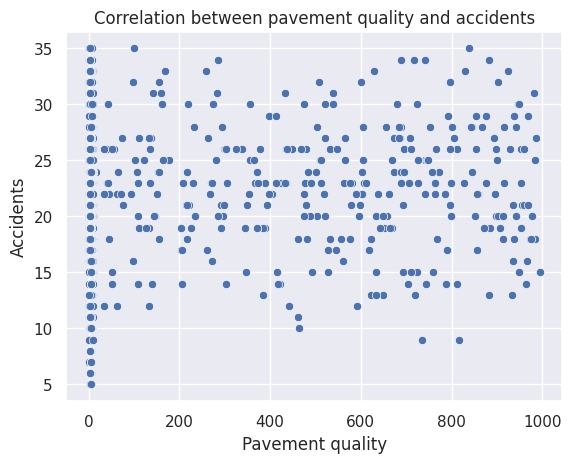

In [ ]:
#Checking the correlation between pavement quality and accidents
print(data['pavement_quality'].corr(data['accidents']))

sns.scatterplot(data = data, x = 'pavement_quality', y = 'accidents')
plt.title('Correlation between pavement quality and accidents')
plt.xlabel('Pavement quality')
plt.ylabel('Accidents')
plt.show()


##**Insights from correlation between pavement quality and accidents**

There's a positive correlation between pavement quality such that when the quality of pavements is improved, the number of accidents increases by 6% and when the quality of pavements is decreased, the number of accidents reduces by 6%.



0.09392267772208124


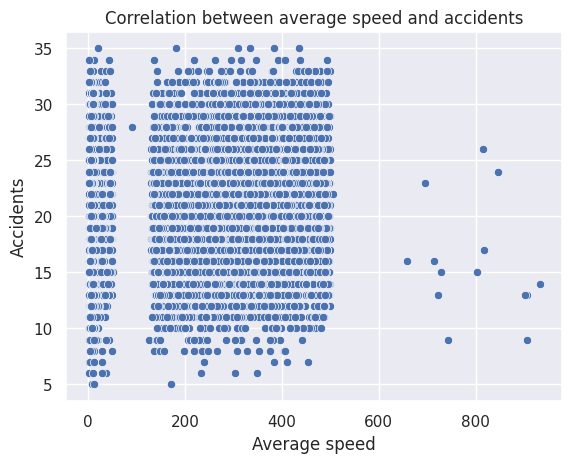

In [ ]:
#Checking the correlation between average speed and accidents
print(data['average_speed'].corr(data['accidents']))

sns.scatterplot(data = data, x = 'average_speed', y = 'accidents')
plt.title('Correlation between average speed and accidents')
plt.xlabel('Average speed')
plt.ylabel('Accidents')
plt.show()

##**Insights from correlation between average speed and accidents**

There's a positive correlation between average speed and accidents such that when the average speed of vehicles increases, the number of accidents increase by 9% while the number of accidents reduces by 9% if the average speed of vehicles decrease.

-0.0916731292173483


Text(0.5, 0, 'Rain intensity')

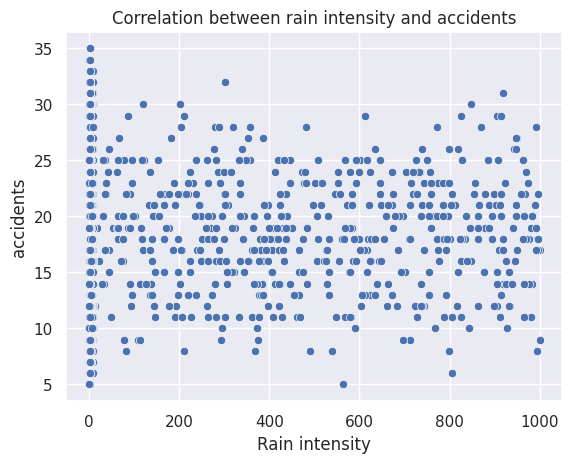

In [ ]:
#Checking the correlation between rain intensity and accidents
print(data['rain_intensity'].corr(data['accidents']))

sns.scatterplot(data = data, x = 'rain_intensity', y = 'accidents')
plt.title('Correlation between rain intensity and accidents')
plt.xlabel('Rain intensity')

##**Insights from correlation between rain intensity and accidents**

There's a negative correlation between rain intensity and accidents such that when rain intensity increases, the number of accidents reduces by 9% and when rain intensity decreases, number of accidents increase by 9%.

In [ ]:
#Arranging the number of accidents in a descending order
data2 = pd.DataFrame(data[['accidents', 'time_of_day']])

dataa = data2.sort_values(by = ['accidents', 'time_of_day'], ascending=False)
dataa



,accidents,time_of_day
8125,35,1970-01-01 00:00:00.000000212
4551,35,1970-01-01 00:00:00.000000202
6989,35,1970-01-01 00:00:00.000000023
454,35,1970-01-01 00:00:00.000000012
3233,35,1970-01-01 00:00:00.000000012
...,...,...
5511,6,1970-01-01 00:00:00.000000003
5953,6,1970-01-01 00:00:00.000000002
7719,5,1970-01-01 00:00:00.000000006
3573,5,1970-01-01 00:00:00.000000004


##**Distribution of number of accidents**

The number of accidents occuring is ranging from 35 to 5 hence giving an overview of the highest and lowest number of accidents occuring as 35 and 5 respectively.

In [ ]:
#Finding the highest number of accidents
max_no_accidents = data2['accidents']
print('The highest number of accidents is : ',max_no_accidents.max())

The highest number of accidents is :  35


In [ ]:
#Finding the lowest number of accidents
min_no_accidents = data2['accidents'].min()
print('The lowest number of accidents is: ', min_no_accidents)

The lowest number of accidents is:  5


##**INSIGHTS**



*  Most accidents occur in urban areas approximately 71% while only 29% of accidents occurs in rural areas.
*  The greatest factor that results into accidents is traffic fine amounts which when it is lowered, it increases the occurrence of accidents by 74%.
*  An increase in number of vehicles on the road increases the number of accidents by 6%.
*   When there are many vehicles on the road, the number of accidents is reduced.
*   When traffic lights are reduced in number, the number of accidents increases by 2%.
*   When the quality of pavement is increased, there is an increase in the number of accidents by 6%.
*   When the average speed used by vehicles is increased,the number of accidents increases.
*   When the rain intensity increases, then the number of accidents reduces.
*   The highest and lowest number of accidents to be recorded are 35 and 5 respectively.




##**Recommendations**

*   Raise traffic fine amounts so as to make the drivers to abide by road traffic rules.
*   Increase the number of traffic lights on roads so as to manage the road traffic flow thereby creating some order in the roads thereby reducing the number of accidents.
*   Setting speed limits for certain roads majorly in the urban areas where most of the accidents occur so as to limit the number of accidents occurring.
*   Encouraging the use of speed governors by drivers so as to limit them from overspeeding thereby reducing the number of accidents occuring.
*   Implementation and enforcing of laws that will be used to punish drivers who misbehave while driving for example when they overspeed, among others.
*   Encouraging drivers to observe traffic rules to avoid being penalized and eventually this significantly reduces the number of road accidents occuring.
*   Limiting the number of vehicles on roads and this will reduce the number of road accidents.
